In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
open("C:/Users/bahaa/OneDrive/Masaüstü/some_of_them/feelings/train.txt","r")

<_io.TextIOWrapper name='C:/Users/bahaa/OneDrive/Masaüstü/some_of_them/feelings/train.txt' mode='r' encoding='cp1254'>

In [3]:
emotions_arr=[]
with open('C:/Users/bahaa/OneDrive/Masaüstü/some_of_them/feelings/train.txt', 'r') as file:
    for line in file:
        emotions_arr.append(line.strip().split(";"))
        

In [4]:
dataframe_our=pd.DataFrame(emotions_arr,columns=["text","category"])

In [5]:
dataframe_our

,text,category
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
import tensorflow as tf

In [7]:
dataframe_our.category.value_counts()

category
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [8]:
pd.unique(dataframe_our.category)

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [9]:
dataframe_our.dropna(inplace=True)

In [10]:
dataframe_our.category.value_counts()

category
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [11]:
def imaged():
    
    plt.figure(figsize=[10,5])
    
    fig=plt.subplot(1,2,1)
    plt.bar(["joy","sadness","anger","fear","love","surprise"],dataframe_our.category.value_counts())
    plt.title("Bar;")
    plt.xlabel("Kategoriler")
    plt.ylabel("Değerler")
    fig=plt.subplot(1,2,2)
    plt.pie(dataframe_our.category.value_counts(),labels=["joy","sadness","anger","fear","love","surprise"],autopct='%1.1f%%')
    plt.title("Pie;")
    

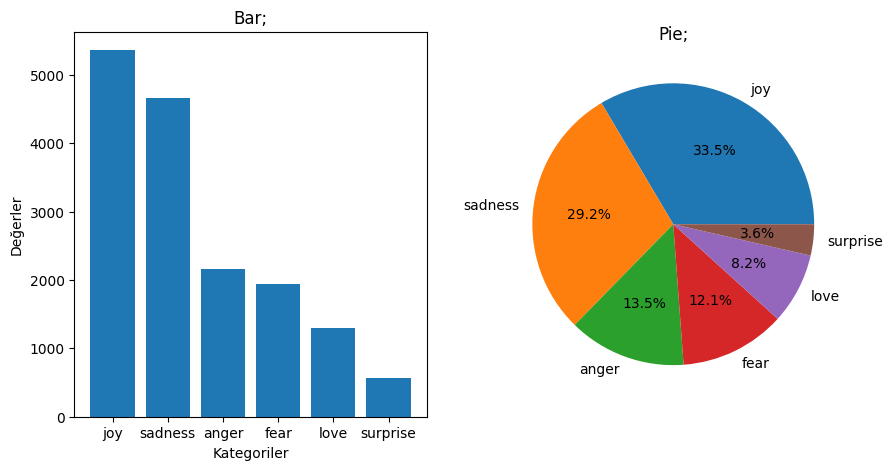

In [12]:
imaged()

In [12]:
import spacy
nlp=spacy.load("en_core_web_lg")
def preprocess(text):
    doc=nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [13]:
listem=dataframe_our.text.apply(preprocess)

In [14]:
dataframe_our["lemmatization"]=listem

In [15]:
dataframe_our

,text,category,lemmatization
0,i didnt feel humiliated,sadness,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damn hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,feel grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,feel like rude comment m glad t


In [16]:
dataframe_our.category="__label__"+dataframe_our["category"]
dataframe_our["description"]=(dataframe_our.category+dataframe_our.lemmatization).astype("str")

In [17]:
dataframe_our

,text,category,lemmatization,description
0,i didnt feel humiliated,__label__sadness,not feel humiliate,__label__sadnessnot feel humiliate
1,i can go from feeling so hopeless to so damned...,__label__sadness,feeling hopeless damn hopeful care awake,__label__sadnessfeeling hopeless damn hopeful ...
2,im grabbing a minute to post i feel greedy wrong,__label__anger,m grab minute post feel greedy wrong,__label__angerm grab minute post feel greedy w...
3,i am ever feeling nostalgic about the fireplac...,__label__love,feel nostalgic fireplace know property,__label__lovefeel nostalgic fireplace know pro...
4,i am feeling grouchy,__label__anger,feel grouchy,__label__angerfeel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,__label__sadness,brief time beanbag say anna feel like beat,__label__sadnessbrief time beanbag say anna fe...
15996,i am now turning and i feel pathetic that i am...,__label__sadness,turn feel pathetic wait table sub teaching degree,__label__sadnessturn feel pathetic wait table ...
15997,i feel strong and good overall,__label__joy,feel strong good overall,__label__joyfeel strong good overall
15998,i feel like this was such a rude comment and i...,__label__anger,feel like rude comment m glad t,__label__angerfeel like rude comment m glad t


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe_our, test_size=0.2)

In [19]:
train.to_csv("emotion_train.train",columns=["description"],header=None,index=False)
test.to_csv("emotion_text.test",columns=["description"],header=None,index=False)

In [20]:
import fasttext

model2=fasttext.train_supervised(input="emotion_train.train",epoch=25,lr=0.1, 
    wordNgrams=2, 
    loss='softmax')



In [21]:
model2.test("emotion_text.test")

(2839, 0.4681225783726664, 0.4681225783726664)

In [22]:
model2.predict("He be very angry after the argument.")

(('__label__angerfeel',), array([0.28545228]))

In [23]:
lemmatized_sentences = [
    "I be very angry because of what happen.",
    "She feel sadness when she hear the news.",
    "They be so happy after the success.",
    "He be afraid of the upcoming test.",
    "I be surprised by the unexpected gift."
]

In [24]:
model2.predict(lemmatized_sentences)

([['__label__angerfeel'],
  ['__label__sadnesshate'],
  ['__label__joyfeel'],
  ['__label__fearfeel'],
  ['__label__surprisefeel']],
 [array([0.18981902], dtype=float32),
  array([0.00341314], dtype=float32),
  array([0.10319529], dtype=float32),
  array([0.15536419], dtype=float32),
  array([0.00974249], dtype=float32)])

In [25]:
model2.predict("What you do here")

(('__label__joyfeeling',), array([0.02410323]))

In [29]:
cümle=preprocess("I love you you dont love me")

In [30]:
def cümle(text):
    

'love not love'

In [32]:
model2.predict(cümle)

(('__label__lovefeel',), array([0.999879]))

In [ ]:

,